In [69]:
# Import packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from scipy import stats
import conorm

In [70]:
# FUNCTIONS: 

# define a function that transforms the sample names to coherent condition names
def sample_to_condition(sample: str) -> str:
    """Transform individual sample name to coherent condition name."""
    if sample.startswith('N'):
        return 'Normoxia'
    elif sample.startswith('A'):
        return 'Anoxia'
    elif sample.startswith('R'):
        return 'Reoxygenation'
    else: 
        raise ValueError(f"Unknown sample name {sample}")

# 1 Import DElncRNA and DESeq data 

In [71]:
# read in DElncRNA data 
lncrna = pd.read_csv('/home/maggy/LncRNA/9_1_dea_lncrna/9_1_1_deg_transcripts/deg_data/ranking_most_diff_lncrna_top3.csv', header=None)
# add m to the 0 column with str replace 
lncrna[0] = lncrna[0].str.replace('strg', 'mstrg')

# Import DEseq results
# IMPORT raw data 
deg_na = pd.read_csv('comp_anoxia_normoxia.csv', header=0, sep=',').assign(condition='NvsA')
deg_nr = pd.read_csv('comp_reoxygenation_normoxia.csv', header=0, sep=',').assign(condition='NvsR')
deg_ar = pd.read_csv('comp_anoxia_reoxygenation.csv', header=0, sep=',').assign(condition='AvsR')
deg = pd.concat([deg_na, deg_nr, deg_ar])
deg.rename({'Unnamed: 0': 'geneid'},axis=1,  inplace=True)
deg.set_index('geneid', inplace=True)


In [72]:
lncrna[0]

0     mstrg.10008.1
1     mstrg.10010.1
2     mstrg.10038.1
3     mstrg.10042.1
4     mstrg.10110.1
          ...      
93    mstrg.11876.1
94    mstrg.11965.1
95    mstrg.12016.1
96    mstrg.12016.2
97    mstrg.12016.3
Name: 0, Length: 98, dtype: object

In [73]:
deg[deg.index.str.lower().isin(lncrna[0])]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,condition
geneid,,,,,,,
MSTRG.108.1,75.173526,-1.161108,0.138815,-5.637691,1.723455e-08,1.170751e-07,NvsA
MSTRG.1013.1,976.265774,0.563276,0.055412,3.334342,8.550161e-04,3.645004e-03,NvsA
MSTRG.1016.1,357.945065,-1.275013,0.073477,-12.201071,3.067622e-34,8.290511e-33,NvsA
MSTRG.1062.1,170.039781,-1.127102,0.122568,-6.107574,1.011568e-09,7.539525e-09,NvsA
MSTRG.1066.1,2816.356995,1.099278,0.078560,9.174784,4.524795e-20,6.416341e-19,NvsA
...,...,...,...,...,...,...,...
MSTRG.11876.1,261.603451,0.633589,0.095683,2.665855,7.679290e-03,7.335701e-02,AvsR
MSTRG.11965.1,1262.256496,0.203510,0.079856,0.000000,1.000000e+00,1.000000e+00,AvsR
MSTRG.12016.1,375.425865,0.399767,0.064928,0.327361,7.433945e-01,1.000000e+00,AvsR


# 2 Import feature counts data

In [74]:
# import fetaure cpounts (gene expression data)
expression = pd.read_csv('/home/maggy/LncRNA/8_create_count_matrix/lncrna_transcriptid/gene_matrix_count.csv', sep=',', index_col=0)


In [75]:
# reorder the columns of the expression dataframes
# Specify the desired column order
column_order = ['N14', 'N15', 'N16', 'N17', 'N18', 'N21', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13']
# Reorder the dataframe columns
expression = expression.reindex(columns=column_order)
# filter the rows that have as a sum less than 50 counts
expression = expression[(expression.sum(axis=1) >= 50)]

In [76]:
# data normlization to get TMM data 
expression_tmm = conorm.tmm(expression)

In [77]:
expression_tmm

,N14,N15,N16,N17,N18,N21,A1,A2,A3,A4,A5,A6,R8,R9,R10,R11,R12,R13
Geneid,,,,,,,,,,,,,,,,,,
MSTRG.1.1,1068.198917,945.829234,1175.459665,872.175456,1084.557115,1046.864314,1332.128920,1415.130036,1496.817210,1563.567811,1411.223042,1362.275337,1161.474092,1283.155418,1156.584198,1071.428651,1107.258770,1065.756093
MSTRG.1.2,1066.233510,942.894914,1171.612006,869.274651,1082.615204,1039.931437,1332.128920,1413.080608,1493.690155,1558.454771,1410.196698,1360.229879,1160.484761,1279.148688,1153.613519,1069.446359,1103.228711,1062.762396
ccar_ua01-g3.t2,134.630406,156.497081,165.449315,142.139459,183.510559,174.312317,105.823325,126.039822,97.981071,138.052096,91.344619,115.568403,183.026156,169.284360,226.761799,185.344272,155.157280,188.602904
ccar_ua01-g3.t2.1.6676fed8,137.578517,158.453295,166.411229,146.007199,183.510559,176.293139,105.823325,127.064536,99.023423,139.074704,92.370963,119.659320,187.972809,172.289408,233.693382,190.300001,159.187339,192.594500
ccar_ua01-g3.t2.2.6676fed8,134.630406,156.497081,165.449315,142.139459,183.510559,174.312317,105.823325,126.039822,97.981071,138.052096,91.344619,115.568403,183.026156,169.284360,226.761799,185.344272,155.157280,188.602904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
scaffold_72-g45758.t1,5.896222,4.890534,8.657232,3.867740,15.535285,5.942465,5.187418,6.148284,0.000000,2.045216,2.052688,3.068188,10.882636,10.016826,6.931583,10.902604,7.052604,3.991596
scaffold_72-g45759.t1,22.602185,14.671601,12.504890,9.669351,20.390062,20.798629,22.824639,23.568422,29.185851,29.655635,22.579569,25.568231,25.722595,32.053843,31.687238,33.698958,28.210415,21.953777
scaffold_72-g45760.t1,20.636778,17.605922,16.352549,8.702416,16.506241,12.875342,21.787155,34.840276,21.889388,31.700852,26.684945,24.545502,34.626570,35.058891,27.726334,34.690104,30.225444,25.945373


In [78]:
# filter expression df for top three DElncRNA
tmm_lnc = expression_tmm[expression_tmm.index.str.lower().isin(lncrna[0])]
# reset index 
tmm_lnc.reset_index(inplace=True)

In [79]:
tmm_lnc

,Geneid,N14,N15,N16,N17,N18,N21,A1,A2,A3,A4,A5,A6,R8,R9,R10,R11,R12,R13
0,MSTRG.108.1,84.512518,104.657423,87.534230,88.958029,105.834132,105.973966,32.161991,45.087416,38.567017,64.424311,48.238169,38.863711,86.071760,97.163213,78.227870,79.291667,92.691362,81.827715
1,MSTRG.1013.1,749.802920,758.032737,689.692782,630.441682,946.681456,784.405427,1096.620147,1152.803251,1130.951722,1338.594026,1188.506387,1041.138358,1064.519696,1136.909758,1101.131531,955.464588,955.124035,1047.793911
2,MSTRG.1016.1,501.178885,468.513137,454.985615,444.790144,515.577286,457.569832,195.046913,192.646232,200.131549,224.973786,217.584934,186.136720,456.081394,447.752125,402.031836,329.060418,384.870655,385.189000
3,MSTRG.1062.1,173.938554,207.358632,213.545045,170.180577,263.128897,177.283550,97.523457,121.940966,80.261090,92.034731,78.002146,99.204736,234.471346,191.321378,247.556549,196.246876,217.623198,214.548277
4,MSTRG.1066.1,1686.319542,1726.358426,1518.863184,1518.088100,1710.823309,2440.372440,4028.548750,3985.112751,3614.876103,4193.715889,3757.445495,3780.007242,3301.396119,2482.169497,3387.563819,2837.650535,2597.373167,2767.173825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,MSTRG.11876.1,358.686849,334.512511,303.003105,308.452295,306.821887,339.710936,198.159364,213.140512,149.056310,199.408583,160.109669,167.727594,313.617791,306.514877,255.478359,240.848439,276.059056,291.386497
94,MSTRG.11965.1,524.763773,547.739784,494.424114,436.087728,629.179060,569.486263,1828.046072,1569.861850,1412.386713,1480.736554,1260.350469,1656.821356,2021.202359,1645.764522,1893.312488,1785.053655,1709.752624,1552.730787
95,MSTRG.12016.1,485.455626,476.337991,472.300078,389.674843,556.357410,507.090377,298.795272,262.326784,286.646750,296.556354,280.191920,260.795954,361.105659,370.622564,398.070931,381.591148,363.712844,341.281445
96,MSTRG.12016.2,557.192995,536.980610,547.329418,460.261105,629.179060,592.265714,352.744418,298.191774,324.171415,340.528503,322.272026,302.727853,421.454824,430.723521,473.328122,442.051044,412.073555,390.178495


In [80]:
# convert from long to short format
tmm_lnc = tmm_lnc.melt(id_vars='Geneid', var_name='sample', value_name='measurement')
# write uniform sample name for each condition 
tmm_lnc['condition'] = tmm_lnc['sample'].apply(sample_to_condition)
tmm_lnc

,Geneid,sample,measurement,condition
0,MSTRG.108.1,N14,84.512518,Normoxia
1,MSTRG.1013.1,N14,749.802920,Normoxia
2,MSTRG.1016.1,N14,501.178885,Normoxia
3,MSTRG.1062.1,N14,173.938554,Normoxia
4,MSTRG.1066.1,N14,1686.319542,Normoxia
...,...,...,...,...
1759,MSTRG.11876.1,R13,291.386497,Reoxygenation
1760,MSTRG.11965.1,R13,1552.730787,Reoxygenation
1761,MSTRG.12016.1,R13,341.281445,Reoxygenation
1762,MSTRG.12016.2,R13,390.178495,Reoxygenation


# 3 Normalization of data

In [81]:
grouped = tmm_lnc.groupby(['Geneid'])

tmm_norm = []

for gene_id, data in grouped: 
    # calculate the mean for normoxia
    mean = data.loc[data.condition == 'Normoxia', 'measurement']
    if len(mean) == 0: 
        continue
    mean = mean.mean() 
    # calculate the geomean in normoxia 
    geomean = stats.gmean(data.loc[data.condition == 'Normoxia', 'measurement'])
    # write the calculated mean into a new column
    data["norm_average"] = mean
    # Determination of relative deviation
    data["rel_deviation"] = data["measurement"]/mean
    tmm_norm.append(data)
tmm_norm = pd.concat(tmm_norm)
tmm_norm

,Geneid,sample,measurement,condition,norm_average,rel_deviation
7,MSTRG.10008.1,N14,404.873923,Normoxia,391.556385,1.034012
105,MSTRG.10008.1,N15,400.045664,Normoxia,391.556385,1.021681
203,MSTRG.10008.1,N16,373.222872,Normoxia,391.556385,0.953178
301,MSTRG.10008.1,N17,314.253906,Normoxia,391.556385,0.802576
399,MSTRG.10008.1,N18,433.046082,Normoxia,391.556385,1.105961
...,...,...,...,...,...,...
1371,MSTRG.12016.3,R9,380.639390,Reoxygenation,500.537550,0.760461
1469,MSTRG.12016.3,R10,440.650658,Reoxygenation,500.537550,0.880355
1567,MSTRG.12016.3,R11,399.431773,Reoxygenation,500.537550,0.798006
1665,MSTRG.12016.3,R12,366.735389,Reoxygenation,500.537550,0.732683


# Significance test 

In [82]:
from scipy.stats import f_oneway
from scipy.stats import alexandergovern

# test if expression changes are significant 
def stats_test(data: pd.DataFrame):
    grouped = data.groupby('Geneid')
    anova_results = pd.DataFrame(columns=['F', 'p'])
    for geneid, data in grouped: 
        if data['rel_deviation'].isna().all(): 
            continue
        samples=[]
        std_dev=[]
        for _, sample in data.groupby('condition'):
            samples.append(sample['rel_deviation'])
            std_dev.append(sample['rel_deviation'].std())
        if np.all(np.isclose(std_dev, np.mean(std_dev), rtol=0.5)):
            test='anova'
            res = f_oneway(*samples)
        else:
            test= 'alexander-govern'
            res = alexandergovern(*samples)
        F,p = res.statistic, res.pvalue
        anova_results.loc[geneid, 'F'] = F
        anova_results.loc[geneid, 'p'] = p
        anova_results.loc[geneid, 'Test'] = test
    return anova_results

In [83]:
# apply the defines significance test onto the dataframe 
stat_res = stats_test(tmm_norm)
stat_res

,F,p,Test
MSTRG.10008.1,42.383426,0.000001,anova
MSTRG.10010.1,18.738537,0.000083,anova
MSTRG.10038.1,57.131517,0.0,alexander-govern
MSTRG.10042.1,54.688617,0.0,anova
MSTRG.10110.1,18.909007,0.000078,alexander-govern
...,...,...,...
MSTRG.11876.1,49.169135,0.0,anova
MSTRG.11965.1,44.040957,0.0,alexander-govern
MSTRG.12016.1,30.610549,0.0,alexander-govern
MSTRG.12016.2,29.07154,0.0,alexander-govern


In [84]:
from scipy.stats import tukey_hsd
from scipy.stats import mannwhitneyu

# perform post-hoc test 
def posthoc_test(data: pd.DataFrame): 
    grouped = data.groupby('Geneid')
    posthoc_results = pd.DataFrame(index=data['Geneid'].unique())
    for geneid, data in grouped: 
        if data['rel_deviation'].isna().all(): 
            continue
        samples=[]
        groups = list(data.groupby('condition').groups.keys())
        names = []
        for i in groups: 
            for j in groups: 
                names.append('p ' + i+j)
        for name, sample in data.groupby(['condition']):
            samples.append(sample['rel_deviation'])
        test = 'tukey_hsd'
        res = tukey_hsd(*samples)
        posthoc_results.loc[geneid,names] = res.pvalue.flatten()
    return posthoc_results


In [85]:
post_res = posthoc_test(tmm_norm)
post_res.drop(columns=['p AnoxiaAnoxia', 'p ReoxygenationReoxygenation', 'p NormoxiaNormoxia', 'p AnoxiaNormoxia', 'p ReoxygenationNormoxia', 'p ReoxygenationNormoxia', 'p ReoxygenationAnoxia'], inplace=True)
post_res

,p AnoxiaReoxygenation,p NormoxiaAnoxia,p NormoxiaReoxygenation
MSTRG.10008.1,8.082268e-01,1.631213e-06,4.280371e-06
MSTRG.10010.1,3.200861e-01,8.334954e-05,1.433178e-03
MSTRG.10038.1,5.010437e-13,3.996803e-15,4.480398e-07
MSTRG.10042.1,5.929638e-01,1.120594e-06,2.748507e-07
MSTRG.10110.1,5.202758e-02,1.739798e-06,1.292920e-04
...,...,...,...
MSTRG.11876.1,2.049999e-05,2.175406e-07,2.310105e-02
MSTRG.11965.1,4.964051e-02,3.309392e-08,1.868360e-09
MSTRG.12016.1,1.350870e-03,1.416532e-07,1.452265e-04
MSTRG.12016.2,7.913049e-04,9.496904e-08,1.359735e-04


# 5 PLOT (Barplot)

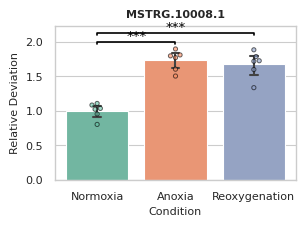

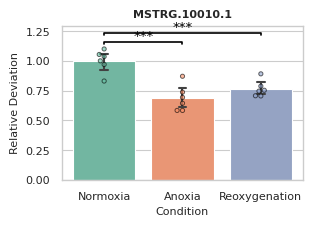

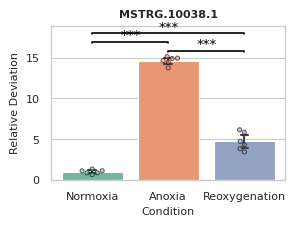

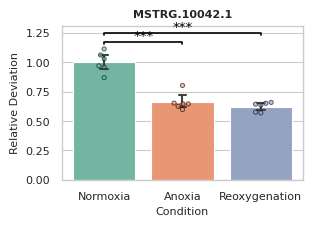

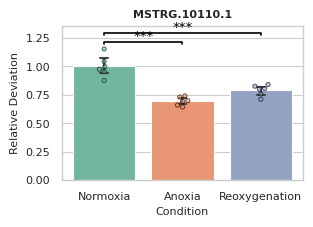

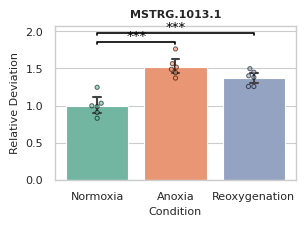

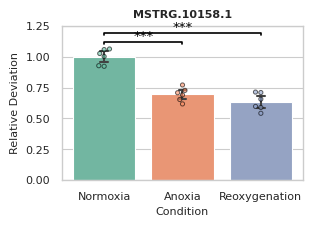

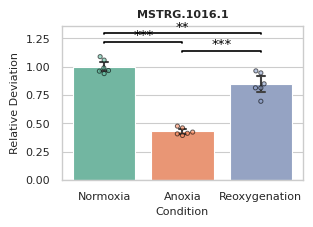

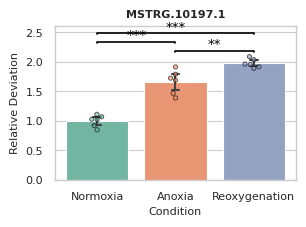

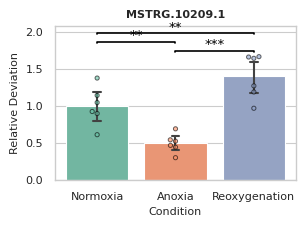

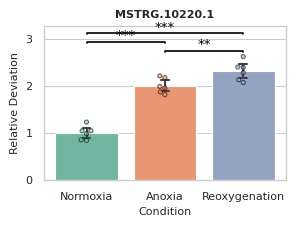

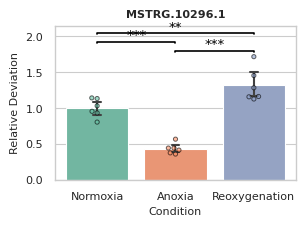

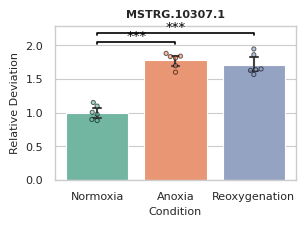

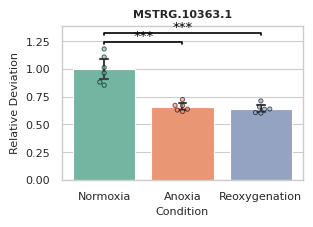

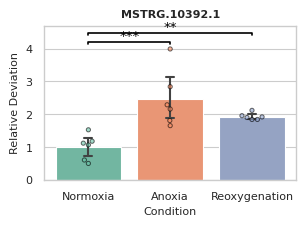

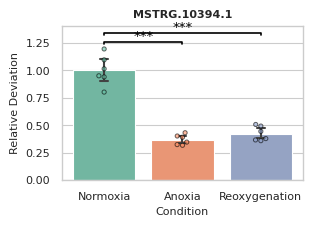

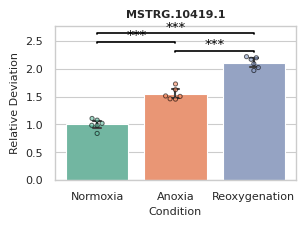

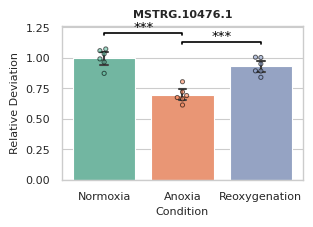

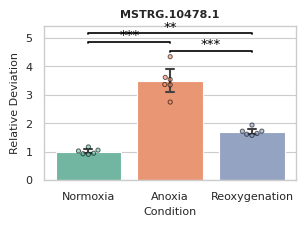

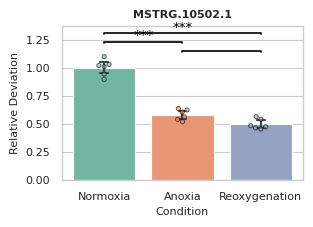

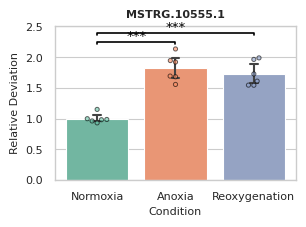

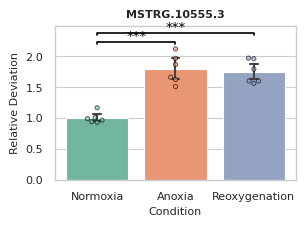

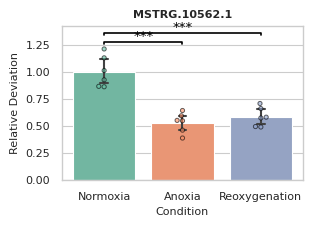

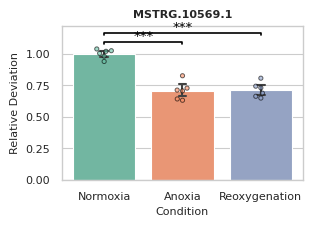

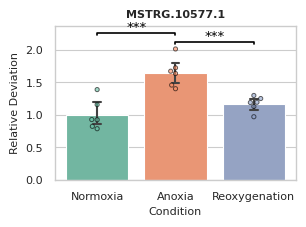

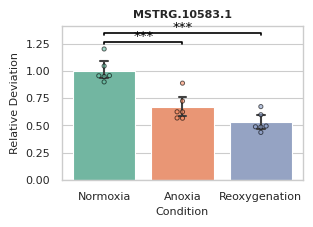

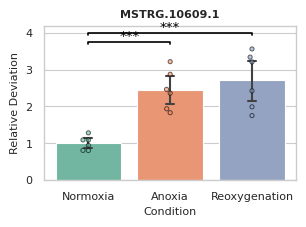

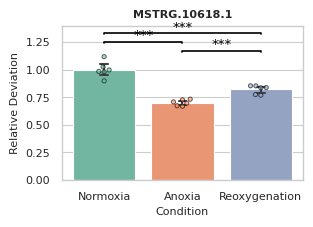

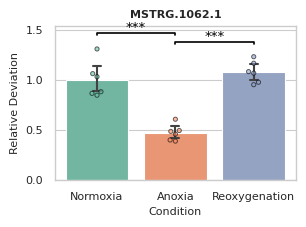

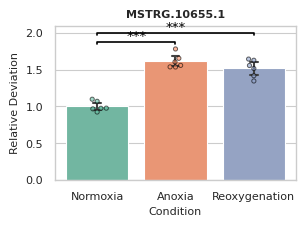

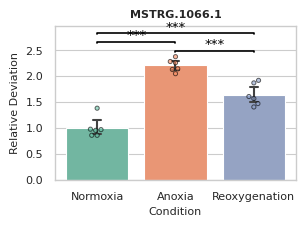

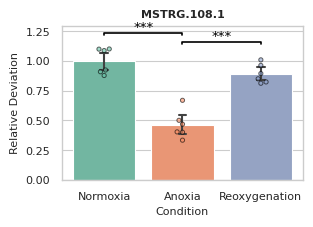

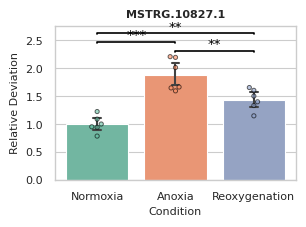

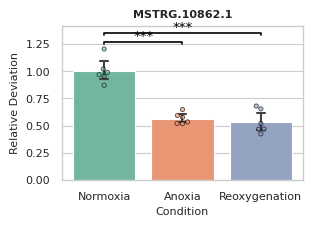

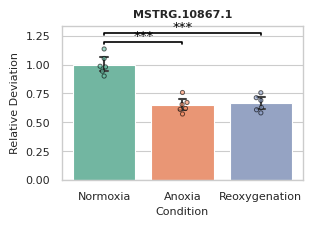

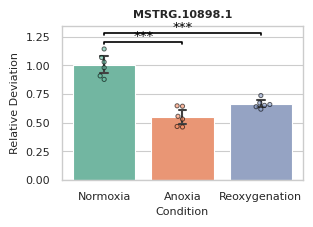

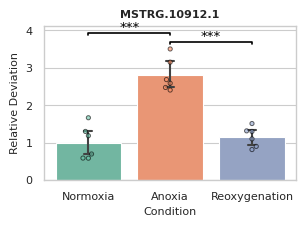

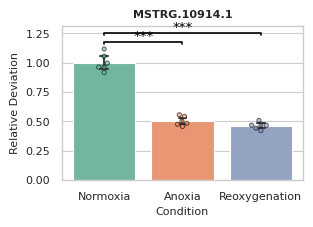

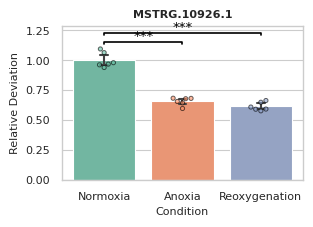

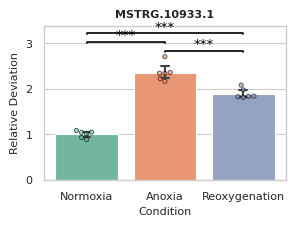

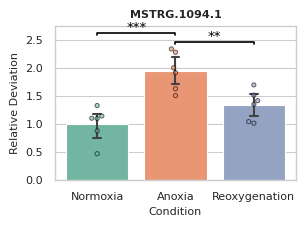

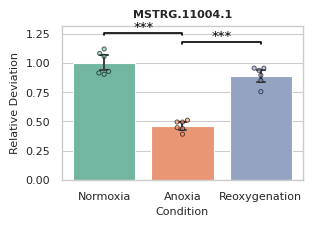

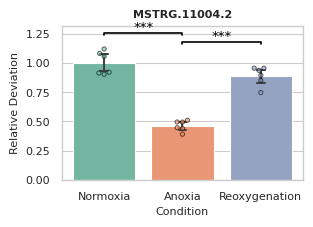

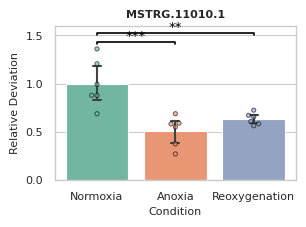

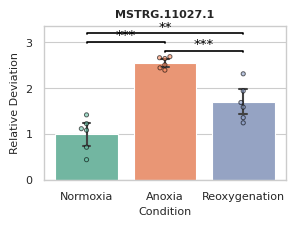

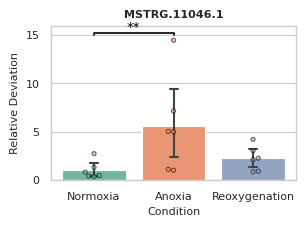

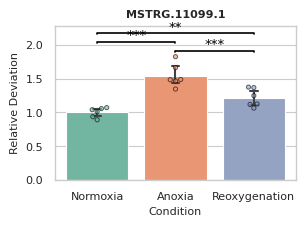

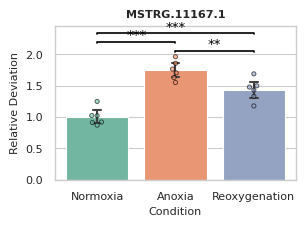

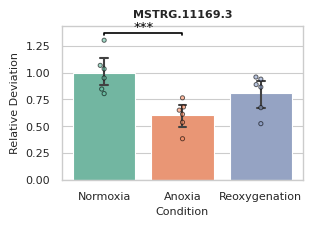

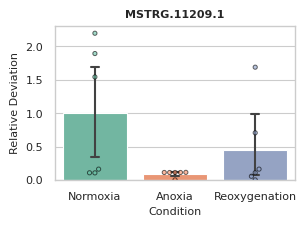

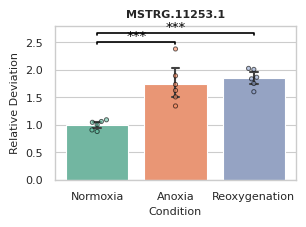

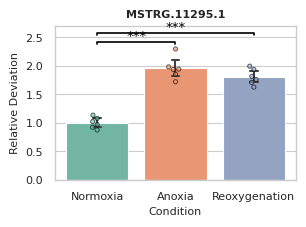

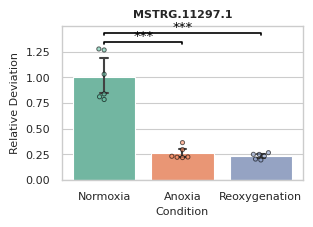

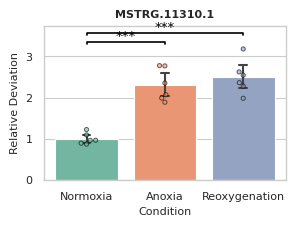

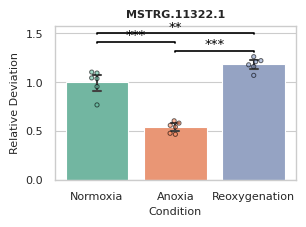

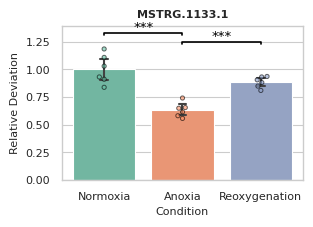

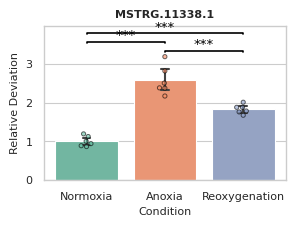

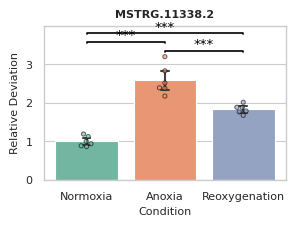

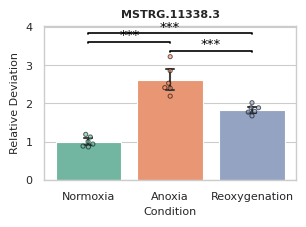

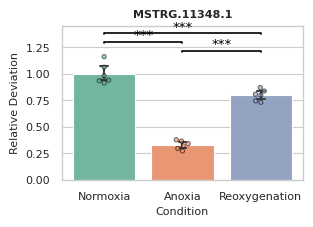

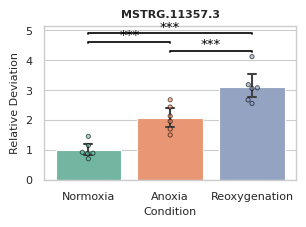

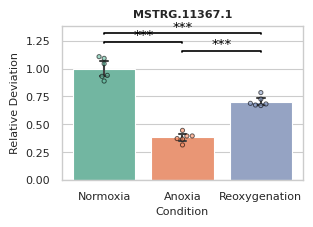

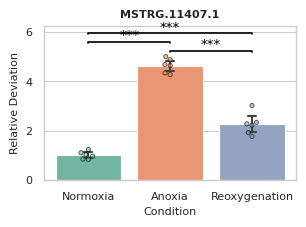

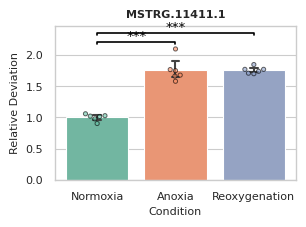

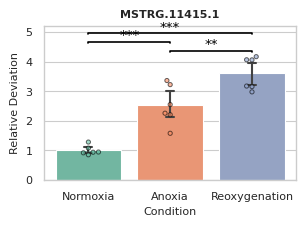

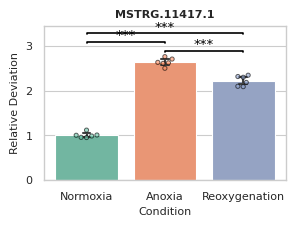

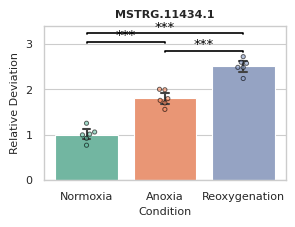

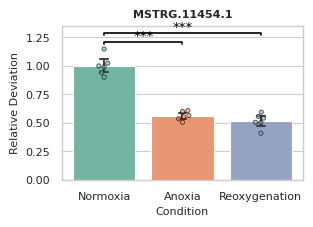

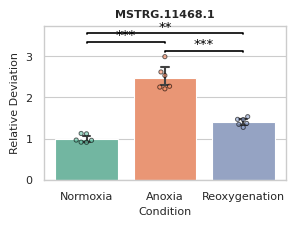

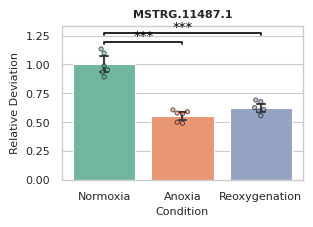

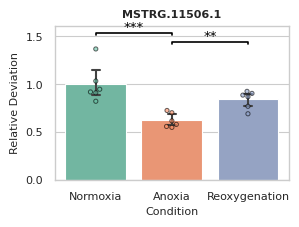

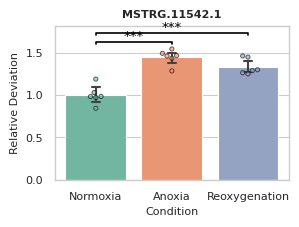

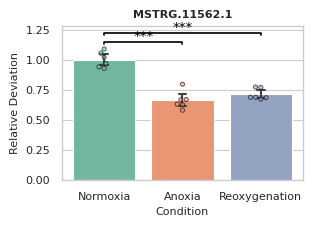

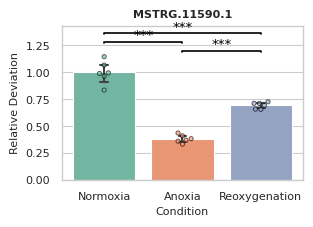

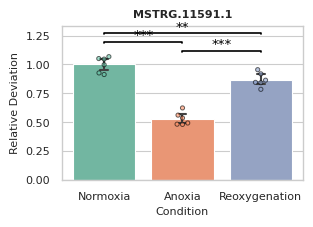

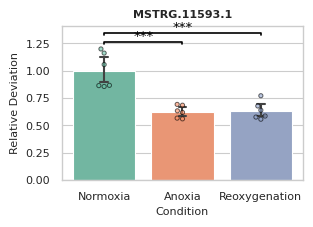

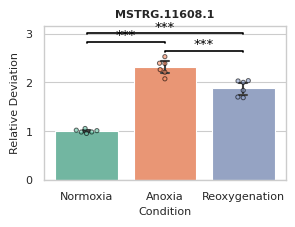

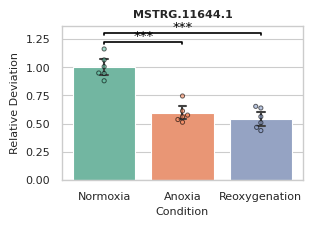

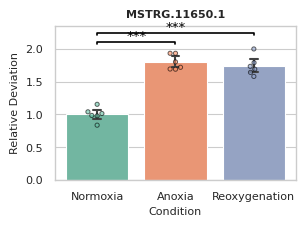

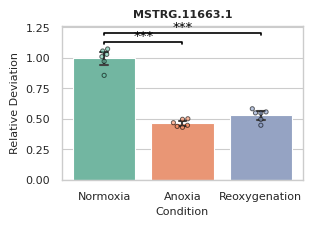

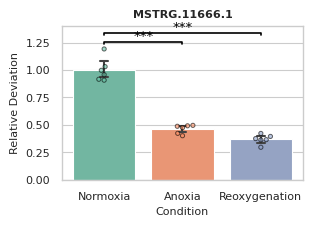

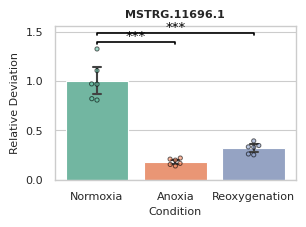

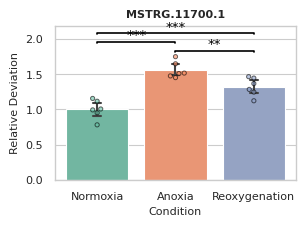

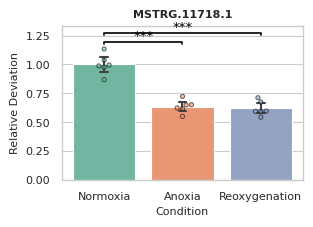

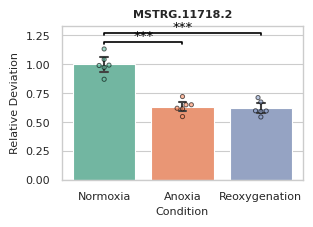

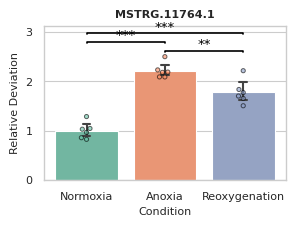

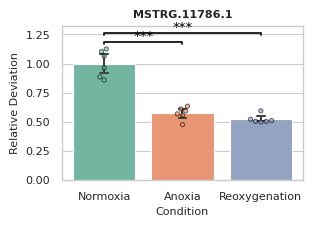

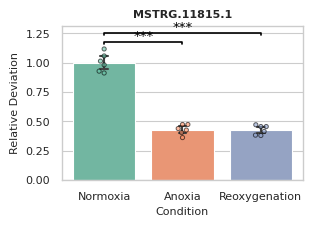

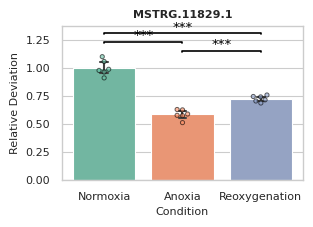

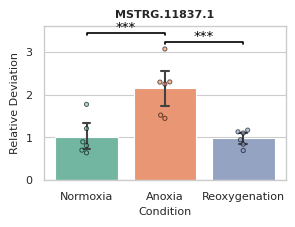

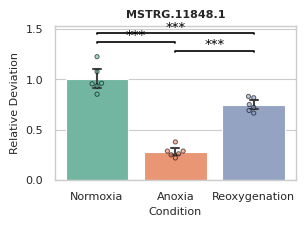

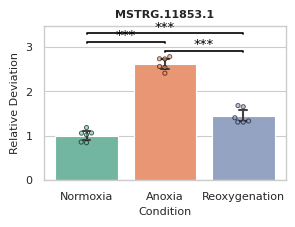

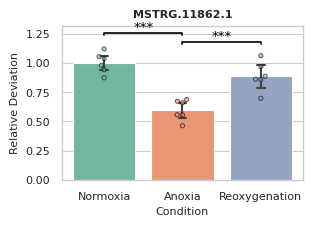

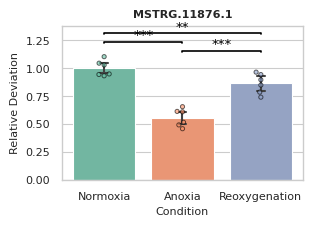

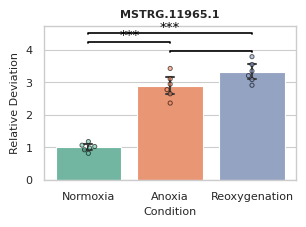

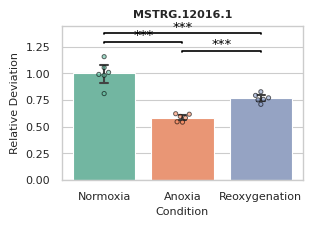

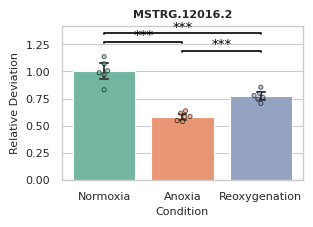

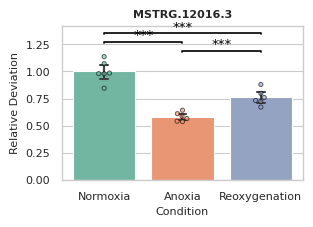

In [86]:
# define sig list 
sig_list = {'p AnoxiaReoxygenation': (1,2),
            'p NormoxiaAnoxia': (0,1),
            'p NormoxiaReoxygenation': (0,2)}

def sig_cat(s):
    if s < 0.0027:
        return "***"
    if s < 0.0455:
        return "**"
    
# set sns colorpallete to colorblind 
sns.set_theme(palette='Set2', style = 'whitegrid', context='paper', rc={'axes.labelsize':8, 'xtick.labelsize':8, 'ytick.labelsize':8, 'legend.fontsize':8, 'legend.title_fontsize':8})

for geneid, data in tmm_norm.groupby('Geneid'): 
    if np.any(stat_res.loc[geneid, 'Test'] == ''):
        continue
    # PLOT
    plt.figure(figsize=(8/2.54, 6/2.54))
    g = sns.barplot(data=data, x='condition', y='rel_deviation', capsize=0.1, err_kws={"linewidth": 1.5}, hue='condition', legend=False)
    sns.swarmplot(data=data, x='condition', y='rel_deviation', size=3, ax=g, 
                  dodge=False, legend=False, linewidth=0.7, edgecolor="k", alpha=0.6, hue='condition')
    # significance bars 
    x_pos = np.array([p.get_x() for p in g.patches])
    x_width = np.array([p.get_width() for p in g.patches])
    x_pos = x_pos + (x_width/2)
    y, h, col = data['rel_deviation'].max() * 1.04, data['rel_deviation'].max() * 0.01, 'k'
    offset=0
    sig_info = post_res.loc[geneid, sig_list.keys()]
    sig_info = sig_info.loc[sig_info <= 0.05]
    for name, value in sig_info.items():
        height= np.array([y, y+h, y+h, y]) + offset
        x1, x2 = x_pos[list(sig_list[name])]
        plt.plot([x1, x1, x2, x2], height, lw=1.2, c=col)
        plt.text((x1+x2)*.5, y+h+offset, sig_cat(value), ha='center', va='bottom', color=col)
        offset += data['rel_deviation'].max() * 0.07    
    plt.title(geneid, fontdict={'weight': 'bold'}, fontsize=8)
    #plt.ylim(top=1.6)
    plt.ylabel('Relative Deviation')
    plt.xlabel('Condition')

    plt.tight_layout()
    plt.show()
    plt.close()
